<a href="https://colab.research.google.com/github/matheusBernal/GymExercises/blob/main/GymExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project uses data from gym members' exercise routines, physical attributes, and other fitness metrics. I will use this information to create two algorithms: one to classify the experience level and  another to perform regression to predict the calories burned.

In [153]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

In [155]:
df = pd.read_csv('/content/gym_members_exercise_tracking.csv')
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [156]:
df = df[['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM','Resting_BPM', 'Session_Duration (hours)','Fat_Percentage', 'Water_Intake (liters)','Workout_Frequency (days/week)', 'BMI','Workout_Type','Calories_Burned','Experience_Level']]

In [157]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Workout_Type,Calories_Burned,Experience_Level
0,56,Male,88.3,1.71,180,157,60,1.69,12.6,3.5,4,30.20,Yoga,1313.0,3
1,46,Female,74.9,1.53,179,151,66,1.30,33.9,2.1,4,32.00,HIIT,883.0,2
2,32,Female,68.1,1.66,167,122,54,1.11,33.4,2.3,4,24.71,Cardio,677.0,2
3,25,Male,53.2,1.70,190,164,56,0.59,28.8,2.1,3,18.41,Strength,532.0,1
4,38,Male,46.1,1.79,188,158,68,0.64,29.2,2.8,3,14.39,Strength,556.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,10.0,3.5,4,28.77,Strength,1364.0,3
969,25,Male,66.6,1.61,184,166,56,1.38,25.0,3.0,2,25.69,Strength,1260.0,1
970,59,Female,60.4,1.76,194,120,53,1.72,18.8,2.7,5,19.50,Cardio,929.0,3
971,32,Male,126.4,1.83,198,146,62,1.10,28.2,2.1,3,37.74,HIIT,883.0,2


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Fat_Percentage                 973 non-null    float64
 9   Water_Intake (liters)          973 non-null    float64
 10  Workout_Frequency (days/week)  973 non-null    int64  
 11  BMI                            973 non-null    float64
 12  Workout_Type                   973 non-null    obj

In [159]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Calories_Burned,Experience_Level
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,24.976773,2.626619,3.321686,24.912127,905.422405,1.809866
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,6.259419,0.600172,0.913047,6.660879,272.641516,0.739693
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,10.000000,1.500000,2.000000,12.320000,303.000000,1.000000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,21.300000,2.200000,3.000000,20.110000,720.000000,1.000000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,26.200000,2.600000,3.000000,24.160000,893.000000,2.000000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,29.300000,3.100000,4.000000,28.560000,1076.000000,2.000000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,35.000000,3.700000,5.000000,49.840000,1783.000000,3.000000


In [160]:
 #First i'll need to using the label encoder on column Gender to pass on train regression
genderLabel = LabelEncoder()
workoutTypeLabel = LabelEncoder()
df_preprocessing = df
df_preprocessing['Gender'] = genderLabel.fit_transform(df_preprocessing['Gender'])
df_preprocessing['Workout_Type'] = workoutTypeLabel.fit_transform(df_preprocessing['Workout_Type'])
df_preprocessing

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Workout_Type,Calories_Burned,Experience_Level
0,56,1,88.3,1.71,180,157,60,1.69,12.6,3.5,4,30.20,3,1313.0,3
1,46,0,74.9,1.53,179,151,66,1.30,33.9,2.1,4,32.00,1,883.0,2
2,32,0,68.1,1.66,167,122,54,1.11,33.4,2.3,4,24.71,0,677.0,2
3,25,1,53.2,1.70,190,164,56,0.59,28.8,2.1,3,18.41,2,532.0,1
4,38,1,46.1,1.79,188,158,68,0.64,29.2,2.8,3,14.39,2,556.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,10.0,3.5,4,28.77,2,1364.0,3
969,25,1,66.6,1.61,184,166,56,1.38,25.0,3.0,2,25.69,2,1260.0,1
970,59,0,60.4,1.76,194,120,53,1.72,18.8,2.7,5,19.50,0,929.0,3
971,32,1,126.4,1.83,198,146,62,1.10,28.2,2.1,3,37.74,1,883.0,2


Now, let's examine the correlation between the variables and calories burned and select the strongest variables (positive or negative) to create our regression model. If the variable is greater than 0.5, it is strongly positive (variable > 0.5). If the variable is less than -0.5, it is strongly negative (variable < 0.5). And if the variable is close to or equal to zero, its strength is considered null.

In [161]:
df_preprocessing.iloc[:,:-1]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Workout_Type,Calories_Burned
0,56,1,88.3,1.71,180,157,60,1.69,12.6,3.5,4,30.20,3,1313.0
1,46,0,74.9,1.53,179,151,66,1.30,33.9,2.1,4,32.00,1,883.0
2,32,0,68.1,1.66,167,122,54,1.11,33.4,2.3,4,24.71,0,677.0
3,25,1,53.2,1.70,190,164,56,0.59,28.8,2.1,3,18.41,2,532.0
4,38,1,46.1,1.79,188,158,68,0.64,29.2,2.8,3,14.39,2,556.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,10.0,3.5,4,28.77,2,1364.0
969,25,1,66.6,1.61,184,166,56,1.38,25.0,3.0,2,25.69,2,1260.0
970,59,0,60.4,1.76,194,120,53,1.72,18.8,2.7,5,19.50,0,929.0
971,32,1,126.4,1.83,198,146,62,1.10,28.2,2.1,3,37.74,1,883.0


In [162]:
df_preprocessing.iloc[:,:-1].corr()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Workout_Type,Calories_Burned
Age,1.000000,0.027175,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,0.002370,0.041528,0.008055,-0.013691,0.044296,-0.154679
Gender,0.027175,1.000000,0.579340,0.583503,0.010245,0.009648,0.014062,-0.012200,-0.407309,0.667658,-0.018902,0.311970,0.035473,0.150646
Weight (kg),-0.036340,0.579340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,-0.225512,0.394276,-0.011769,0.853158,-0.028724,0.095443
Height (m),-0.027837,0.583503,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,-0.235521,0.393533,-0.011270,-0.159469,0.037712,0.086348
Max_BPM,-0.017073,0.010245,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,-0.009056,0.031621,-0.029099,0.067105,0.010061,0.002090
Avg_BPM,0.035969,0.009648,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,-0.007302,-0.002911,-0.010681,0.021605,-0.008206,0.339659
Resting_BPM,0.004354,0.014062,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,-0.016834,0.007726,-0.007967,-0.032543,-0.011013,0.016518
Session_Duration (hours),-0.019912,-0.012200,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,-0.581520,0.283411,0.644140,-0.006493,0.035443,0.908140
Fat_Percentage,0.002370,-0.407309,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,1.000000,-0.588683,-0.537060,-0.119258,-0.031913,-0.597615
Water_Intake (liters),0.041528,0.667658,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,-0.588683,1.000000,0.238563,0.213697,0.004411,0.356931


<Axes: >

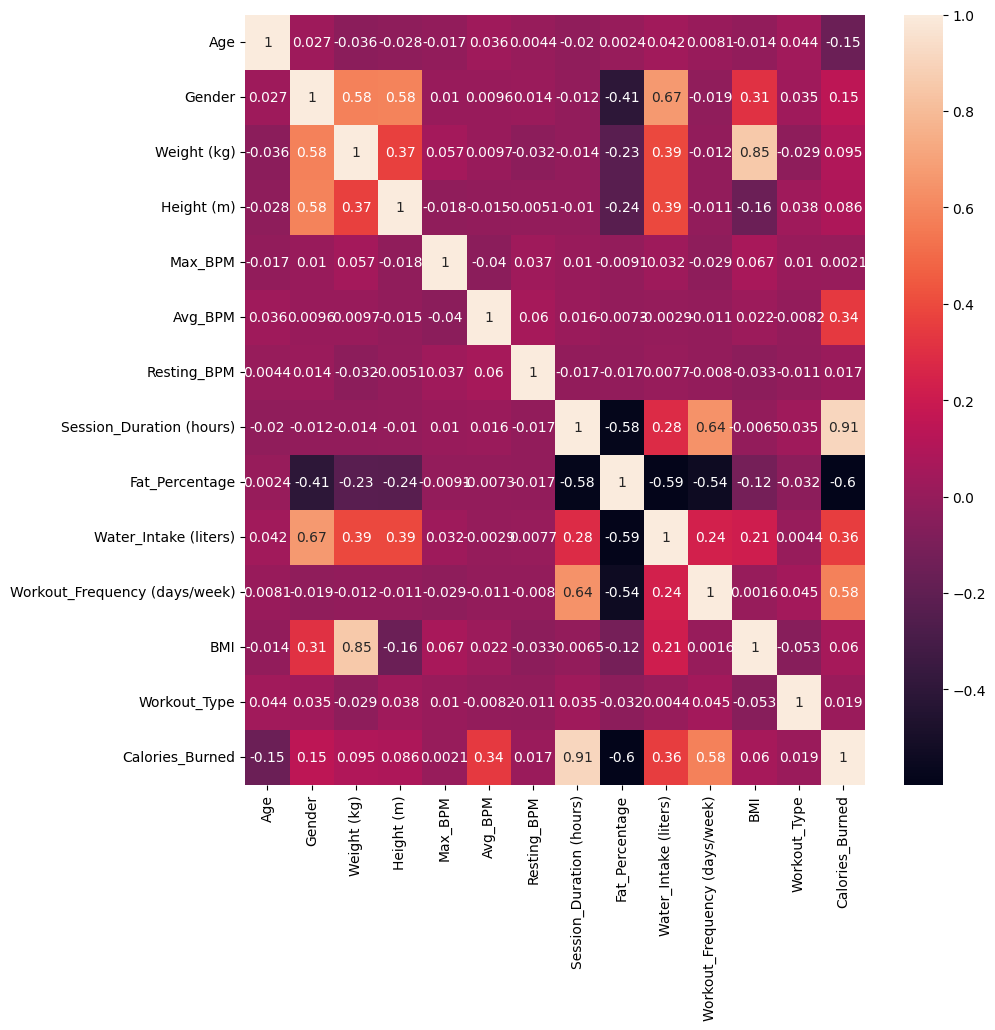

In [163]:
plt.figure(figsize=(10,10))
sns.heatmap(df_preprocessing.iloc[:,:-1].corr(),annot=True)

In [164]:
x_cb = df_preprocessing[['Session_Duration (hours)','Fat_Percentage','Workout_Frequency (days/week)']].values
y_cb = df_preprocessing['Calories_Burned'].values

In [165]:
x_cb_train,x_cb_test,y_cb_train,y_cb_test = train_test_split(x_cb,y_cb,test_size=0.25,random_state=0)

In [166]:
model = LinearRegression()
linear_model = model.fit(x_cb_train,y_cb_train)
prediction_train = linear_model.predict(x_cb_train)
prediction_test = linear_model.predict(x_cb_test)
print(linear_model.coef_,linear_model.intercept_)
print('Train score:',round(linear_model.score(x_cb_train,y_cb_train),3)*100)
print('Test score:',round(linear_model.score(x_cb_test,y_cb_test),3)*100)
print(mean_squared_error(y_cb_train,prediction_train),mean_squared_error(y_cb_test,prediction_test))
print(mean_absolute_error(y_cb_train,prediction_train),mean_squared_error(y_cb_test,prediction_test))

[692.87130272  -4.69027023 -13.85300984] 199.20150741117448
Train score: 82.8
Test score: 84.89999999999999
12700.343862769116 11456.98772314392
89.07646790806226 11456.98772314392


The function that our LineaRegression create is Y = 692.87130272 * X  -4.69027023 * Z -13.85300984 * W + 199.20150741117448. And the score on the train's data is 82,8% and tests data is 84,9%

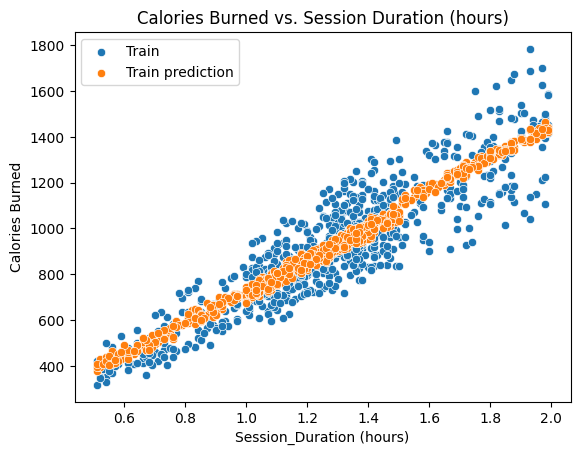

In [167]:
sns.scatterplot(x=x_cb_train[:, 0], y=y_cb_train)
sns.scatterplot(x=x_cb_train[:, 0], y=prediction_train)
plt.legend(['Train','Train prediction'])
plt.xlabel('Session_Duration (hours)')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs. Session Duration (hours)')
plt.show()

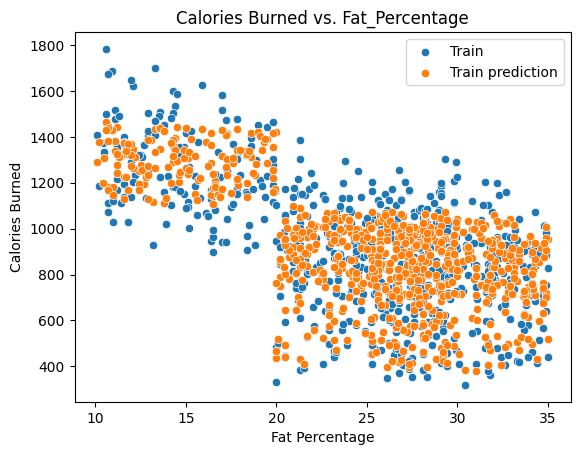

In [168]:
sns.scatterplot(x=x_cb_train[:, 1], y=y_cb_train)
sns.scatterplot(x=x_cb_train[:, 1], y=prediction_train)
plt.legend(['Train','Train prediction'])
plt.xlabel('Fat Percentage')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs. Fat_Percentage')
plt.show()

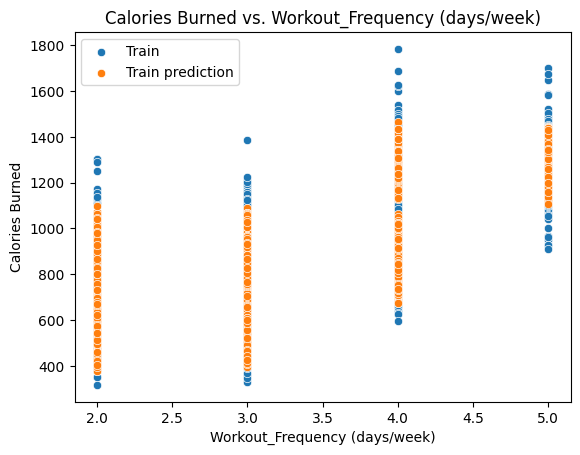

In [169]:
sns.scatterplot(x=x_cb_train[:, 2], y=y_cb_train)
sns.scatterplot(x=x_cb_train[:, 2], y=prediction_train)
plt.legend(['Train','Train prediction'])
plt.xlabel('Workout_Frequency (days/week)')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs. Workout_Frequency (days/week)')
plt.show()

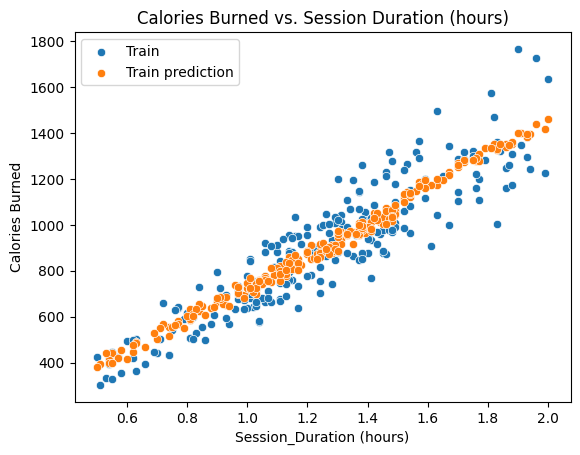

In [170]:
sns.scatterplot(x=x_cb_test[:, 0], y=y_cb_test)
sns.scatterplot(x=x_cb_test[:, 0], y=prediction_test)
plt.legend(['Train','Train prediction'])
plt.xlabel('Session_Duration (hours)')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs. Session Duration (hours)')
plt.show()


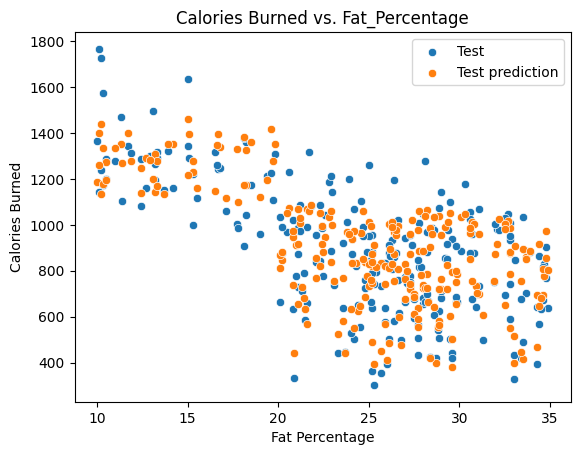

In [171]:
sns.scatterplot(x=x_cb_test[:, 1], y=y_cb_test)
sns.scatterplot(x=x_cb_test[:, 1], y=prediction_test)
plt.legend(['Test','Test prediction'])
plt.xlabel('Fat Percentage')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs. Fat_Percentage')
plt.show()

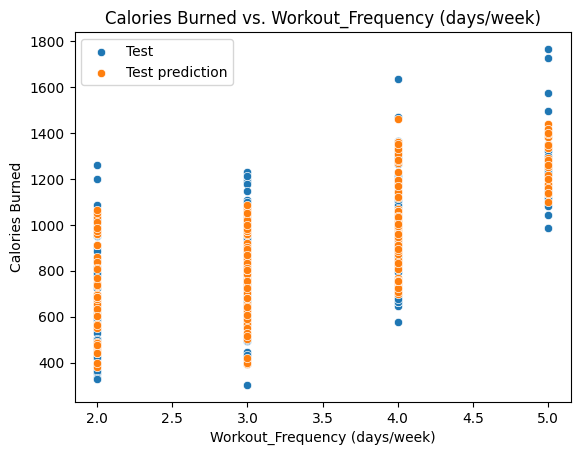

In [172]:
sns.scatterplot(x=x_cb_test[:, 2], y=y_cb_test)
sns.scatterplot(x=x_cb_test[:, 2], y=prediction_test)
plt.legend(['Test','Test prediction'])
plt.xlabel('Workout_Frequency (days/week)')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs. Workout_Frequency (days/week)')
plt.show()

Let's try with Ridge function

In [173]:
ridge = Ridge()
ridge_model = ridge.fit(x_cb_train,y_cb_train)
prediction_train = ridge_model.predict(x_cb_train)
prediction_test = ridge_model.predict(x_cb_test)
print(ridge_model.coef_,ridge_model.intercept_)
print('Train score:',round(ridge_model.score(x_cb_train,y_cb_train),3)*100)
print('Test score:',round(ridge_model.score(x_cb_test,y_cb_test),3)*100)


[677.36426536  -4.97980721 -11.19528472] 217.19467666001117
Train score: 82.69999999999999
Test score: 84.89999999999999


Th function that our Ridge create is Y = 677.36426536 * X  -4.97980721 * Z -11.19528472 * W + 217.19467666001117. And the score on the train's data is 82,6% and tests data is 84,9%. So we don't have any difference between the Ridge and the Linear Model in fact

Now let's make the Experience Level classification

In [174]:
df_preprocessing.shape

(973, 15)

In [175]:
#First, I will use the OneHotEncoder and ColumnTransformer on the Gender column. Finally, I will apply StandardScaler to prepare the data for the classification model.
OneHotEncoderGender = ColumnTransformer([('OneHot',OneHotEncoder(),[1,12])],remainder='passthrough')
x_experiênce_level = df_preprocessing.iloc[:,:-1].values
y_experience_level = df_preprocessing.iloc[:,-1].values
x_experiênce_level = OneHotEncoderGender.fit_transform(x_experiênce_level)
x_experiênce_level = StandardScaler().fit_transform(x_experiênce_level)
x_experiênce_level.shape

(973, 18)

Now Let's try using some methods to create our classification. First let's try use Gaussian. Accuracy 87,3%

In [176]:
x_experiênce_level_train,x_experiênce_level_test,y_experience_level_train,y_experience_level_test = train_test_split(x_experiênce_level,y_experience_level,test_size=0.25,random_state=0)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5)
grid_search.fit(x_experiênce_level_train, y_experience_level_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.8888899385923477


In [177]:
gaussianModel = GaussianNB(var_smoothing=1e-09)
gaussian_model = gaussianModel.fit(x_experiênce_level_train,y_experience_level_train)

In [178]:
prediction_train_level = gaussian_model.predict(x_experiênce_level_train)
prediction_test_level = gaussian_model.predict(x_experiênce_level_test)

print('Train score:',round(accuracy_score(y_experience_level_train,prediction_train_level),3)*100)
print('Test score:',round(accuracy_score(y_experience_level_test,prediction_test_level),3)*100)

Train score: 89.4
Test score: 87.3


In [179]:
confusion_matrix(y_experience_level_train,prediction_train_level),confusion_matrix(y_experience_level_test,prediction_test_level)

(array([[224,  57,   0],
        [ 20, 286,   0],
        [  0,   0, 142]]),
 array([[75, 20,  0],
        [11, 89,  0],
        [ 0,  0, 49]]))

In [180]:
print(classification_report(y_experience_level_train,prediction_train_level),classification_report(y_experience_level_test,prediction_test_level))

              precision    recall  f1-score   support

           1       0.92      0.80      0.85       281
           2       0.83      0.93      0.88       306
           3       1.00      1.00      1.00       142

    accuracy                           0.89       729
   macro avg       0.92      0.91      0.91       729
weighted avg       0.90      0.89      0.89       729
               precision    recall  f1-score   support

           1       0.87      0.79      0.83        95
           2       0.82      0.89      0.85       100
           3       1.00      1.00      1.00        49

    accuracy                           0.87       244
   macro avg       0.90      0.89      0.89       244
weighted avg       0.88      0.87      0.87       244



Now Let's use the Decision Tree and forward I'll use the grid Search to create the algorithm. Accuracy: 85,6%

In [181]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_experiênce_level_train, y_experience_level_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [182]:
decisionTreeXpLevel = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_features= None, min_samples_leaf = 4, min_samples_split= 2)
decisionTreeXpLevel_model = decisionTreeXpLevel.fit(x_experiênce_level_train,y_experience_level_train)
print('Train score: ',accuracy_score(y_experience_level_train,decisionTreeXpLevel_model.predict(x_experiênce_level_train)))
print('Test score: ',accuracy_score(y_experience_level_test,decisionTreeXpLevel_model.predict(x_experiênce_level_test)))

Train score:  0.9423868312757202
Test score:  0.8729508196721312


Let's see the tree

[Text(0.3557692307692308, 0.9545454545454546, 'x[12] <= 0.725\ngini = 0.637\nsamples = 729\nvalue = [281, 306, 142]'),
 Text(0.3173076923076923, 0.8636363636363636, 'x[15] <= -0.9\ngini = 0.499\nsamples = 587\nvalue = [281, 306, 0]'),
 Text(0.33653846153846156, 0.9090909090909092, 'True  '),
 Text(0.27884615384615385, 0.7727272727272727, 'gini = 0.0\nsamples = 147\nvalue = [147, 0, 0]'),
 Text(0.3557692307692308, 0.7727272727272727, 'x[12] <= -0.792\ngini = 0.424\nsamples = 440\nvalue = [134, 306, 0]'),
 Text(0.3173076923076923, 0.6818181818181818, 'gini = 0.0\nsamples = 61\nvalue = [61, 0, 0]'),
 Text(0.3942307692307692, 0.6818181818181818, 'x[15] <= 0.195\ngini = 0.311\nsamples = 379\nvalue = [73, 306, 0]'),
 Text(0.3557692307692308, 0.5909090909090909, 'x[17] <= -0.185\ngini = 0.447\nsamples = 216\nvalue = [73, 143, 0]'),
 Text(0.15384615384615385, 0.5, 'x[17] <= -0.363\ngini = 0.496\nsamples = 81\nvalue = [37, 44, 0]'),
 Text(0.07692307692307693, 0.4090909090909091, 'x[8] <= -1.43\

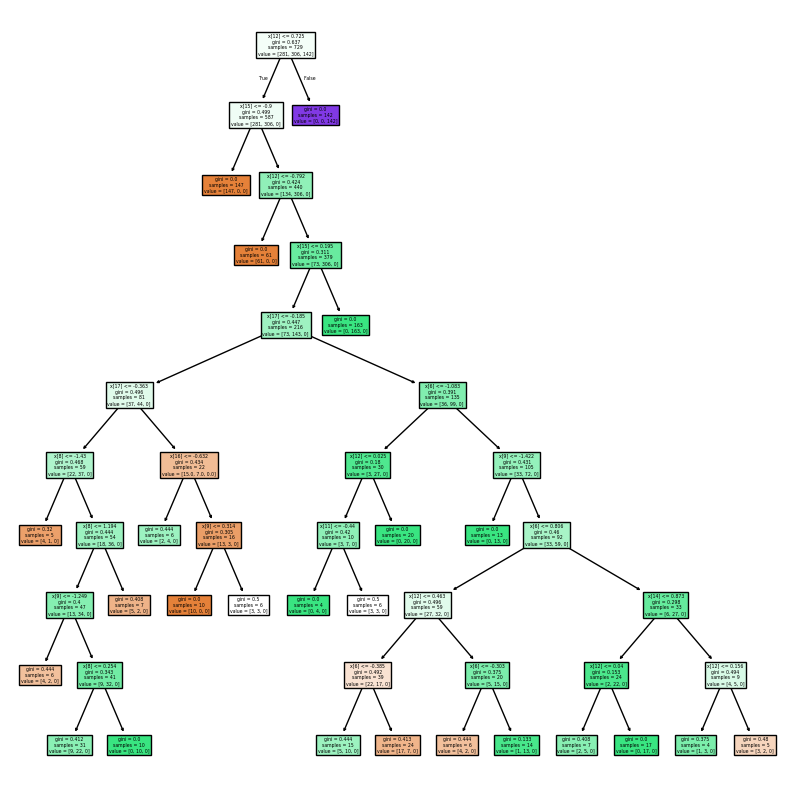

In [183]:
figure,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
tree.plot_tree(
    decisionTreeXpLevel_model,
    filled=True,
    ax=ax
)

In [184]:
confusion_matrix(y_experience_level_train,decisionTreeXpLevel_model.predict(x_experiênce_level_train)),confusion_matrix(y_experience_level_test,decisionTreeXpLevel_model.predict(x_experiênce_level_test))

(array([[261,  20,   0],
        [ 22, 284,   0],
        [  0,   0, 142]]),
 array([[82, 13,  0],
        [18, 82,  0],
        [ 0,  0, 49]]))

In [185]:
print(classification_report(y_experience_level_train,decisionTreeXpLevel_model.predict(x_experiênce_level_train)),classification_report(y_experience_level_test,decisionTreeXpLevel_model.predict(x_experiênce_level_test)))

              precision    recall  f1-score   support

           1       0.92      0.93      0.93       281
           2       0.93      0.93      0.93       306
           3       1.00      1.00      1.00       142

    accuracy                           0.94       729
   macro avg       0.95      0.95      0.95       729
weighted avg       0.94      0.94      0.94       729
               precision    recall  f1-score   support

           1       0.82      0.86      0.84        95
           2       0.86      0.82      0.84       100
           3       1.00      1.00      1.00        49

    accuracy                           0.87       244
   macro avg       0.89      0.89      0.89       244
weighted avg       0.87      0.87      0.87       244



Now I'm going to use the random forest algoritm.Accuracy 88,1%

In [ ]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_experiênce_level_train, y_experience_level_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

In [ ]:
randomForestXpLevel = RandomForestClassifier(criterion = 'entropy', max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)
randomForestXpLevel_model = randomForestXpLevel.fit(x_experiênce_level_train,y_experience_level_train)
print('Train score: ',accuracy_score(y_experience_level_train,randomForestXpLevel_model.predict(x_experiênce_level_train)))
print('Test score: ',accuracy_score(y_experience_level_test,randomForestXpLevel_model.predict(x_experiênce_level_test)))

In [ ]:
accuracy_score(y_experience_level_train,randomForestXpLevel_model.predict(x_experiênce_level_train)),accuracy_score(y_experience_level_test,randomForestXpLevel_model.predict(x_experiênce_level_test))

In [ ]:
confusion_matrix(y_experience_level_train,randomForestXpLevel_model.predict(x_experiênce_level_train)),confusion_matrix(y_experience_level_test,randomForestXpLevel_model.predict(x_experiênce_level_test))

In [ ]:
print(classification_report(y_experience_level_train,randomForestXpLevel_model.predict(x_experiênce_level_train)),classification_report(y_experience_level_test,randomForestXpLevel_model.predict(x_experiênce_level_test)))

Let's use now the SVM. Acuracy 86,1%


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'tol':[0.0001,0.00001,0.000001],
}
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_experiênce_level_train, y_experience_level_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [ ]:
SVCXpLevel = SVC(C=1,gamma='scale',kernel='linear',tol=0.0001)
SVCXpLevel_model = SVCXpLevel.fit(x_experiênce_level_train,y_experience_level_train)
print('Train score: ',accuracy_score(y_experience_level_train,SVCXpLevel_model.predict(x_experiênce_level_train)))
print('Test score: ',accuracy_score(y_experience_level_test,SVCXpLevel_model.predict(x_experiênce_level_test)))

In [ ]:
accuracy_score(y_experience_level_train,SVCXpLevel_model.predict(x_experiênce_level_train)),accuracy_score(y_experience_level_test,SVCXpLevel_model.predict(x_experiênce_level_test))

In [ ]:
confusion_matrix(y_experience_level_train,SVCXpLevel_model.predict(x_experiênce_level_train)),confusion_matrix(y_experience_level_test,SVCXpLevel_model.predict(x_experiênce_level_test))

In [ ]:
print(classification_report(y_experience_level_train,SVCXpLevel_model.predict(x_experiênce_level_train)),classification_report(y_experience_level_test,SVCXpLevel_model.predict(x_experiênce_level_test)))

Let's use K Neighbors.Accuracy 80,3%

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_experiênce_level_train, y_experience_level_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [ ]:
kNeighborsXpLevel = KNeighborsClassifier(metric='manhattan',n_neighbors=11,p=1,weights='uniform')
kNeighborsXpLevel_model = kNeighborsXpLevel.fit(x_experiênce_level_train,y_experience_level_train)
print('Train score: ',accuracy_score(y_experience_level_train,kNeighborsXpLevel_model.predict(x_experiênce_level_train)))
print('Test score: ',accuracy_score(y_experience_level_test,kNeighborsXpLevel_model.predict(x_experiênce_level_test)))

In [ ]:
accuracy_score(y_experience_level_train,kNeighborsXpLevel_model.predict(x_experiênce_level_train)),accuracy_score(y_experience_level_test,kNeighborsXpLevel_model.predict(x_experiênce_level_test))

In [ ]:
confusion_matrix(y_experience_level_train,kNeighborsXpLevel_model.predict(x_experiênce_level_train)),confusion_matrix(y_experience_level_test,kNeighborsXpLevel_model.predict(x_experiênce_level_test))

In [ ]:
print(classification_report(y_experience_level_train,kNeighborsXpLevel_model.predict(x_experiênce_level_train)),classification_report(y_experience_level_test,kNeighborsXpLevel_model.predict(x_experiênce_level_test)))

Let's use neural network using the skicit-larn.Accuracy: 85,2%

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (120,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300, 500],
    'early_stopping': [True],
}
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_experiênce_level_train, y_experience_level_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [ ]:
neural_networkXpLevel = MLPClassifier(activation='tanh', alpha=0.001, early_stopping=True, hidden_layer_sizes=(100, 50), learning_rate='constant', max_iter=200, solver='adam')
neural_networkXpLevel_model = neural_networkXpLevel.fit(x_experiênce_level_train,y_experience_level_train)
print('Train score: ',accuracy_score(y_experience_level_train,neural_networkXpLevel_model.predict(x_experiênce_level_train)))
print('Test score: ',accuracy_score(y_experience_level_test,neural_networkXpLevel_model.predict(x_experiênce_level_test)))

In [ ]:
accuracy_score(y_experience_level_train,neural_networkXpLevel_model.predict(x_experiênce_level_train)),accuracy_score(y_experience_level_test,neural_networkXpLevel_model.predict(x_experiênce_level_test))

In [ ]:
confusion_matrix(y_experience_level_train,neural_networkXpLevel_model.predict(x_experiênce_level_train)),confusion_matrix(y_experience_level_test,neural_networkXpLevel_model.predict(x_experiênce_level_test))

In [ ]:
print(classification_report(y_experience_level_train,neural_networkXpLevel_model.predict(x_experiênce_level_train)),classification_report(y_experience_level_test,neural_networkXpLevel_model.predict(x_experiênce_level_test)))